## importing indeed libraries 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### reading data set

In [123]:
data = pd.read_csv('Student p.csv')

print(data.shape)
data.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [124]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [125]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [126]:
num_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/num_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [127]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [128]:
data[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

In [129]:
data['gender'].replace({'male':1, 'female':0}, inplace=True)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


In [130]:
df = data.copy()
df['race/ethnicity'].replace({'group A':5, 'group B':4, 'group C':3, 'group D':2, 'group E':1}, inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,4,bachelor's degree,standard,none,72,72,74
1,0,3,some college,standard,completed,69,90,88
2,0,4,master's degree,standard,none,90,95,93
3,1,5,associate's degree,free/reduced,none,47,57,44
4,1,3,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,1,master's degree,standard,completed,88,99,95
996,1,3,high school,free/reduced,none,62,55,55
997,0,3,high school,free/reduced,completed,59,71,65
998,0,2,some college,standard,completed,68,78,77


### computing total score for student

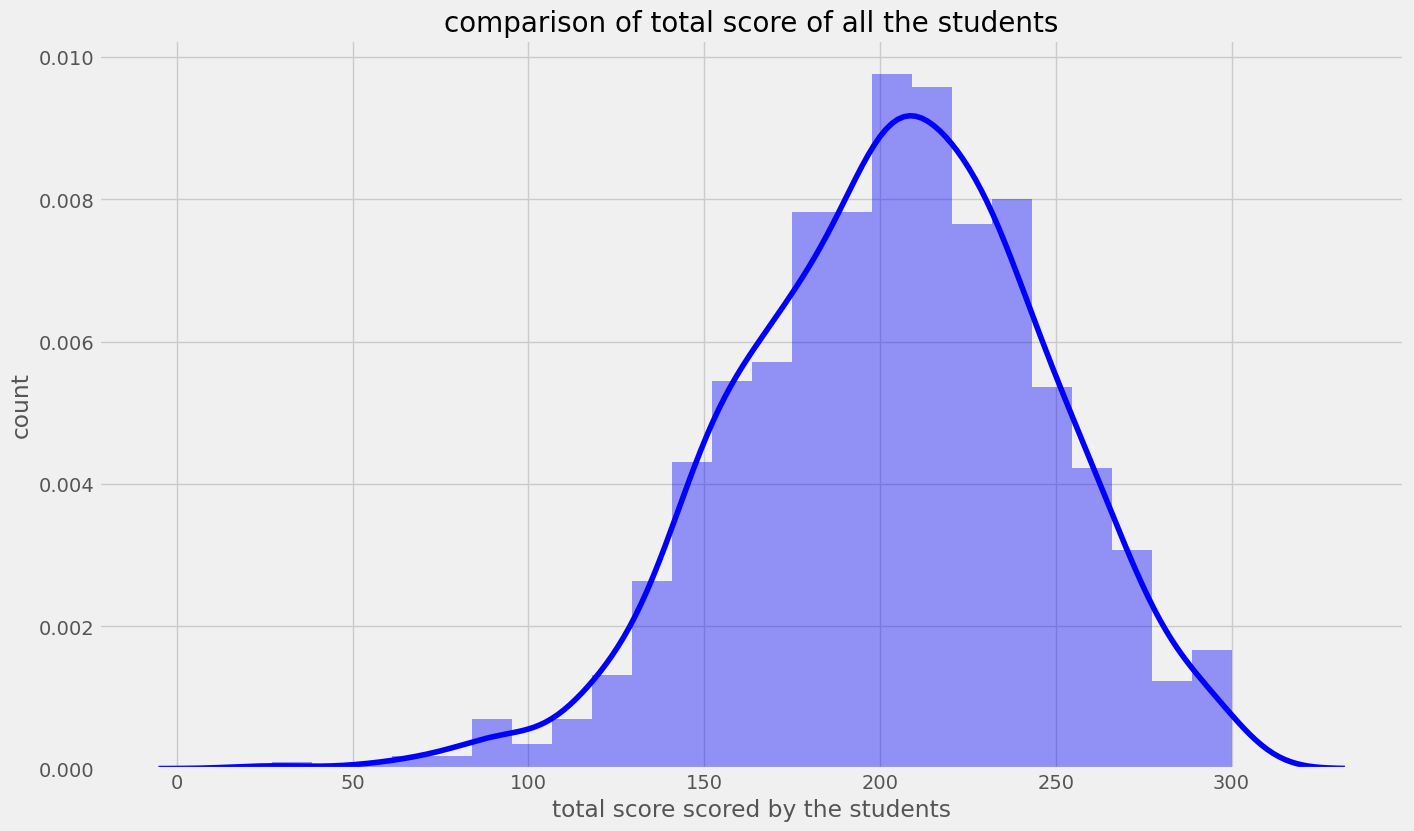

In [131]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.distplot(df['total_score'], color = 'blue')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

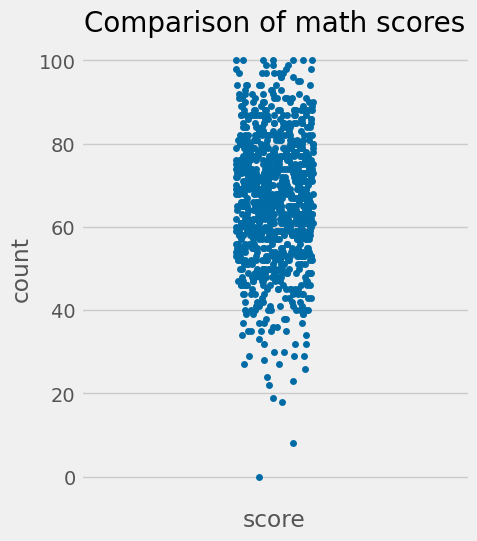

In [132]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.catplot(df['math score'])
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

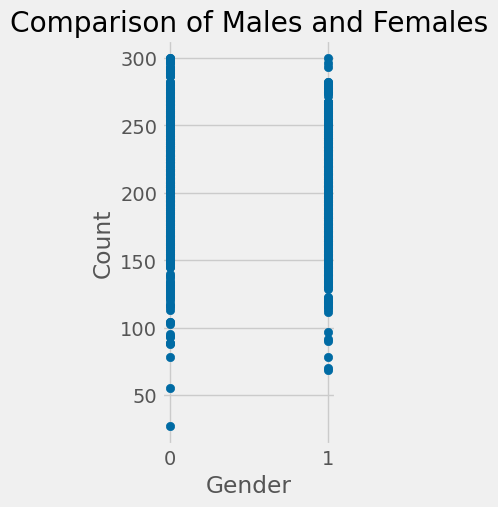

In [133]:
plt.rcParams['figure.figsize'] = (2, 5)
plt.scatter(df['gender'], df['total_score'])
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

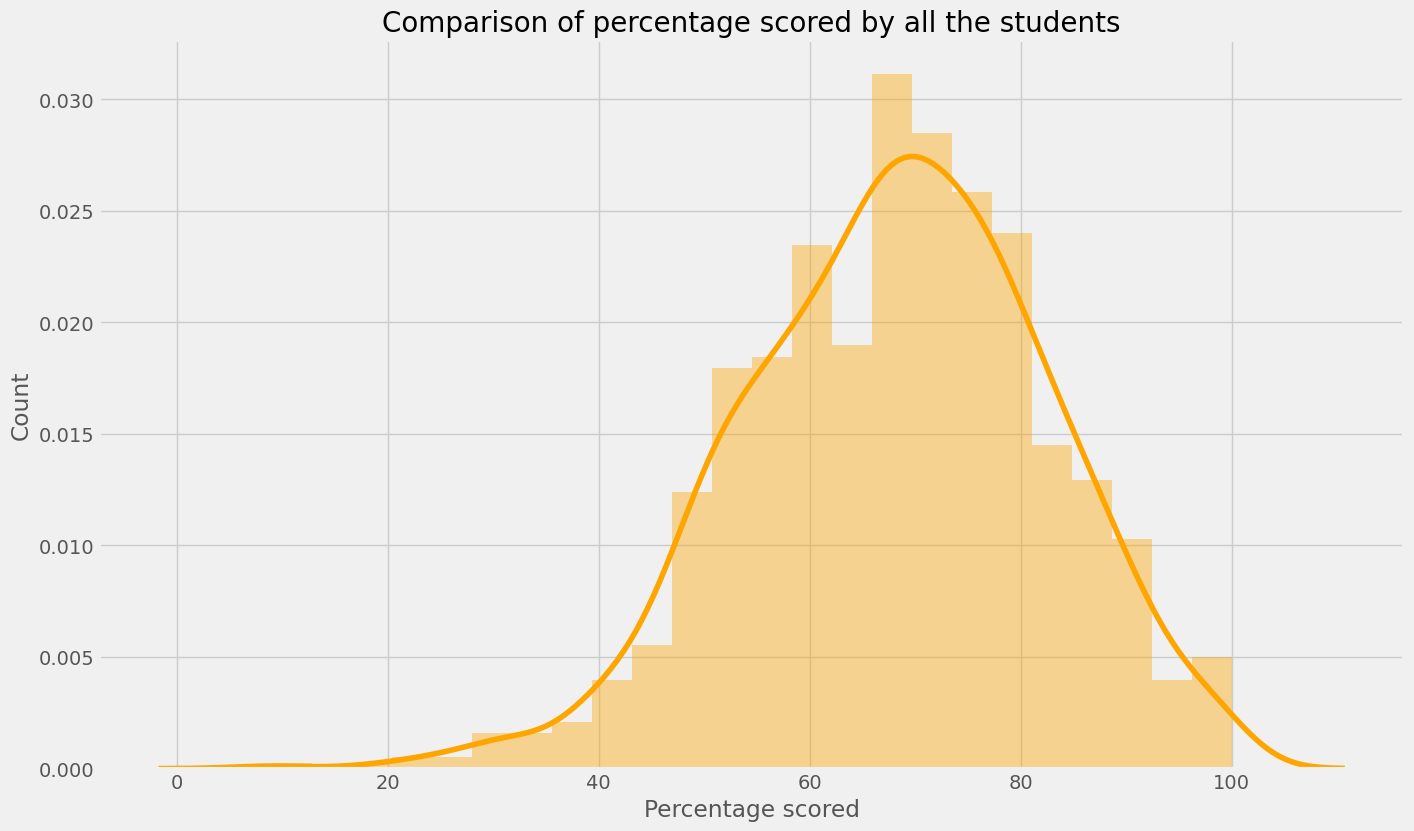

In [134]:
from math import * 

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [135]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage
0,0,4,bachelor's degree,standard,none,72,72,74,218,73.0
1,0,3,some college,standard,completed,69,90,88,247,83.0
2,0,4,master's degree,standard,none,90,95,93,278,93.0
3,1,5,associate's degree,free/reduced,none,47,57,44,148,50.0
4,1,3,some college,standard,none,76,78,75,229,77.0
...,...,...,...,...,...,...,...,...,...,...
995,0,1,master's degree,standard,completed,88,99,95,282,94.0
996,1,3,high school,free/reduced,none,62,55,55,172,58.0
997,0,3,high school,free/reduced,completed,59,71,65,195,65.0
998,0,2,some college,standard,completed,68,78,77,223,75.0


In [136]:
df['pass_fail'] = np.where(df['percentage']< 50, 'fail', 'pass')
df['status'] = df.apply(lambda x : 'Fail' if x['pass_fail'] == 'fail' else 'pass', axis = 1)

In [137]:
def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if percentage >= 90:
    return 'O'
  if percentage >= 80:
    return 'A'
  if percentage >= 70:
    return 'B'
  if percentage >= 60:
    return 'C'
  if percentage >= 40:
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

B    260
C    252
D    178
A    156
E     96
O     58
Name: grades, dtype: int64

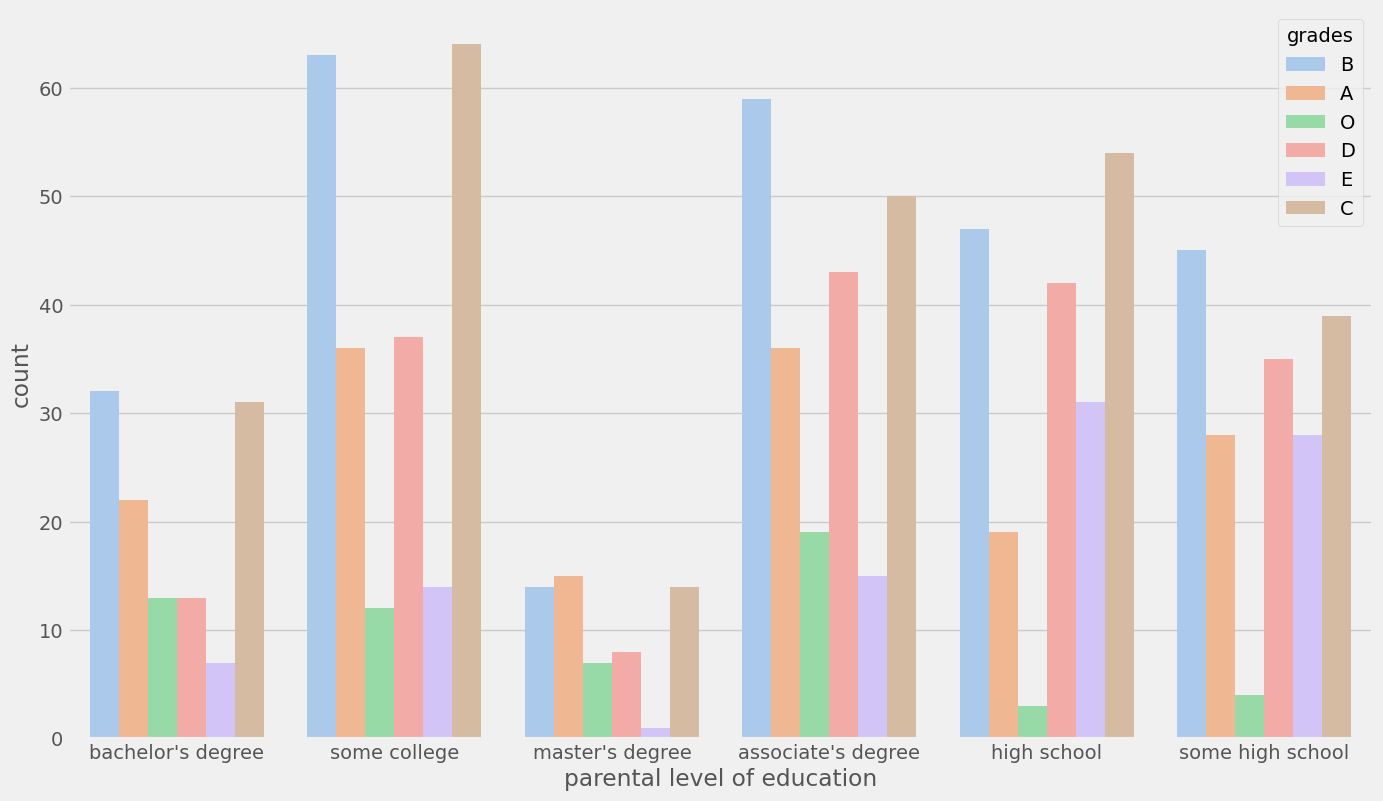

In [138]:
sns.countplot(x = data['parental level of education'], data = data, hue = df['grades'], palette = 'pastel')
plt.show()

#### label encoding 

In [139]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])
df['status'] = label_encoder.fit_transform(df['status'])

In [141]:
df['grades'] = df['grades'].replace('O', 0)
df['grades'] = df['grades'].replace('A', 1)
df['grades'] = df['grades'].replace('B', 2)
df['grades'] = df['grades'].replace('C', 3)
df['grades'] = df['grades'].replace('D', 4)
df['grades'] = df['grades'].replace('E', 5)

In [143]:
df = pd.DataFrame(df)
df.drop('pass_fail', inplace=True, axis = 1)

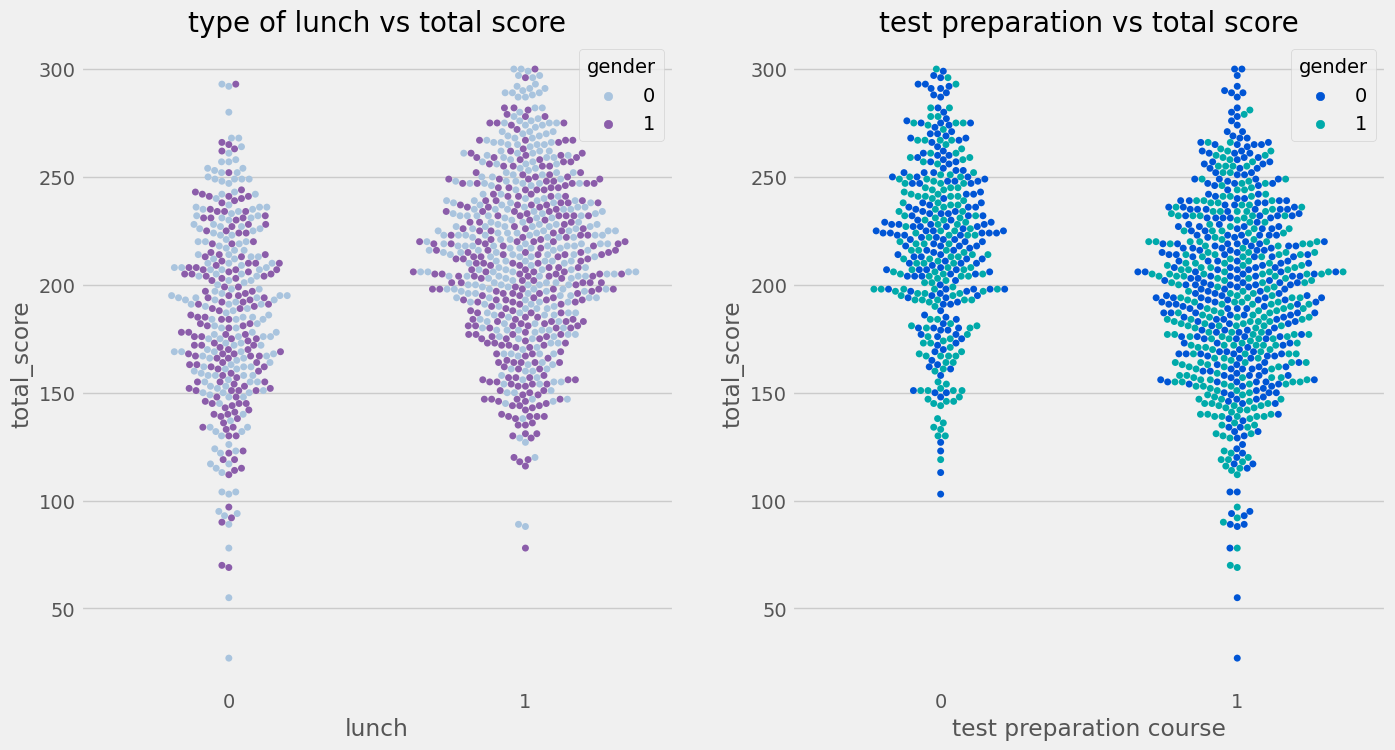

In [171]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 2, 1)
sns.swarmplot(x=df['lunch'], y=df['total_score'], hue = df['gender'], palette = 'BuPu')
plt.title('type of lunch vs total score', fontsize = 20)

plt.subplot(1, 2, 2)
sns.swarmplot(x=df['test preparation course'], y=df['total_score'], hue = df['gender'], palette = 'winter')
plt.title('test preparation vs total score', fontsize = 20)

plt.show()

In [144]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,status,grades
0,0,4,1,1,1,72,72,74,218,73.0,1,2
1,0,3,4,1,0,69,90,88,247,83.0,1,1
2,0,4,3,1,1,90,95,93,278,93.0,1,0
3,1,5,0,0,1,47,57,44,148,50.0,1,4
4,1,3,4,1,1,76,78,75,229,77.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,3,1,0,88,99,95,282,94.0,1,0
996,1,3,2,0,1,62,55,55,172,58.0,1,4
997,0,3,2,0,0,59,71,65,195,65.0,1,3
998,0,2,4,1,0,68,78,77,223,75.0,1,2


In [146]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:11]
y = df.iloc[:,11]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 11)
(800,)
(200, 11)
(200,)


In [147]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_train = min_max.fit_transform(x_train)
x_test = min_max.transform(x_test)

## modeling

### SVM

In [152]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred))

training accuracy : 0.93875
testing accuracy : 0.885
[[ 4  1  0  0  0  0]
 [ 1 23  3  0  0  0]
 [ 0  2 54  6  0  0]
 [ 0  0  4 41  0  0]
 [ 0  0  0  6 29  0]
 [ 0  0  0  0  0 26]]


### decision forest

In [154]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred))

training accuracy : 1.0
testing accuracy : 1.0
[[ 5  0  0  0  0  0]
 [ 0 27  0  0  0  0]
 [ 0  0 62  0  0  0]
 [ 0  0  0 45  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 26]]


In [155]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred))

Training Accuracy : 1.0
Testing Accuracy : 1.0
[[ 5  0  0  0  0  0]
 [ 0 27  0  0  0  0]
 [ 0  0 62  0  0  0]
 [ 0  0  0 45  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 26]]


### logistic regression 

In [156]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred))

Training Accuracy : 0.85875
Testing Accuracy : 0.855
[[ 1  4  0  0  0  0]
 [ 2 20  5  0  0  0]
 [ 0  0 53  9  0  0]
 [ 0  0  4 40  1  0]
 [ 0  0  0  3 32  0]
 [ 0  0  0  0  1 25]]
